# Initial Imports of Data and Combining Expenses, Enrollment Info, and Test Info

In [2]:
import pandas as pd
import numpy as np 

In [3]:
expenses = pd.read_excel("currentexpense1415.xls")
expenses = expenses.iloc[8:].reset_index(drop=True)
expenses.columns = expenses.iloc[0]  # Set the first row as column names
expenses = expenses[1:].reset_index(drop=True)  # Remove the first row and reset the index
'''
Current Expense Per ADA provides a per-student average of spending, not the exact amount spent on each individual 
student but rather an average across all students in the district expenses
'''
selected_columns = ['CO', 'CDS', 'DISTRICT', 'Current Expense Per ADA']
expenses = expenses[selected_columns]
expenses.replace('*', np.nan, inplace=True)
expenses.head(20)
expenses.columns
expenses

,CO,CDS,DISTRICT,Current Expense Per ADA
0,01,61119,Alameda Unified,10197.330059
1,01,61127,Albany City Unified,10529.919611
2,01,61143,Berkeley Unified,13400.678672
3,01,61150,Castro Valley Unified,8540.437796
4,01,61168,Emery Unified,14478.875524
...,...,...,...,...
938,58,72736,Marysville Joint Unified,9304.37967
939,58,72744,Plumas Lake Elementary,8129.494582
940,58,72751,Wheatland Elementary,11608.832192
941,58,72769,Wheatland Union High,9261.582238


In [4]:
enroll = pd.read_csv('cenroll1617.xls', sep='\t', encoding='latin1')

# Replace '*' with NaN in the entire DataFrame
enroll.replace('*', np.nan, inplace=True)

# Convert 'CumulativeEnrollment' to numeric, coercing any errors (e.g., empty strings or NaNs)
enroll['CumulativeEnrollment'] = pd.to_numeric(enroll['CumulativeEnrollment'], errors='coerce')

# Filter the data for AggregateLevel 'S' and ReportingCategory 'SS' or 'TA'
enroll_filtered = enroll[(enroll['AggregateLevel'] == 'S') & 
                         (enroll['ReportingCategory'].isin(['SS', 'TA']))]

# Group by the relevant columns and sum the 'CumulativeEnrollment' for both SS and TA
grouped = enroll_filtered.groupby(['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode', 
                                  'SchoolCode', 'CountyName', 'DistrictName', 'SchoolName', 'Charter', 
                                  'ReportingCategory'])['CumulativeEnrollment'].sum().unstack(fill_value=0)

# Reset index to make it more readable
grouped = grouped.reset_index()

# Calculate the Ratio of SS to TA, making sure no division by zero occurs
grouped['Ratio'] = grouped['SS'] / grouped['TA'].replace(0, np.nan)  # Replace 0s in 'TA' with NaN to avoid div by 0

# Select the desired columns
enroll = grouped[['AcademicYear', 'AggregateLevel', 'CountyCode', 'DistrictCode', 'SchoolCode', 
                  'CountyName', 'DistrictName', 'SchoolName', 'Charter', 'Ratio']]

# The result is now a pandas DataFrame
enroll

ReportingCategory,AcademicYear,AggregateLevel,CountyCode,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,Charter,Ratio
0,2016-17,S,1,10017.0,112607.0,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,All,0.769585
1,2016-17,S,1,10017.0,112607.0,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Yes,0.769585
2,2016-17,S,1,10017.0,123968.0,Alameda,Alameda County Office of Education,Community School for Creative Education,All,0.817814
3,2016-17,S,1,10017.0,123968.0,Alameda,Alameda County Office of Education,Community School for Creative Education,Yes,0.817814
4,2016-17,S,1,10017.0,124172.0,Alameda,Alameda County Office of Education,Yu Ming Charter,All,0.093151
...,...,...,...,...,...,...,...,...,...,...
21139,2016-17,S,58,72769.0,1.0,Yuba,Wheatland Union High,"Nonpublic, Nonsectarian Schools",No,NaN
21140,2016-17,S,58,72769.0,123570.0,Yuba,Wheatland Union High,Wheatland Community Day High,All,0.000000
21141,2016-17,S,58,72769.0,123570.0,Yuba,Wheatland Union High,Wheatland Community Day High,No,0.000000
21142,2016-17,S,58,72769.0,5838305.0,Yuba,Wheatland Union High,Wheatland Union High,All,0.413793


In [5]:
tests = pd.read_csv('sb_ca2015_all_csv_v3 2/sb_ca2015_all_csv_v3.txt', encoding='latin1')
'''
Demographic ID^Demographic ID Num^Demographic Name^Student Group
001^1^All Students^All Students
031^31^Socioeconomically disadvantaged^Economic Status

Test ID^Test ID Num^Test Name
1^1^SB - English Language Arts/Literacy
2^2^SB - Mathematics
'''
tests.columns


Index(['County Code', 'District Code', 'School Code', 'Filler', 'Test Year',
       'Subgroup ID', 'Test Type', 'Total CAASPP Enrollment',
       'Total Tested At Entity Level', 'Total Tested at Subgroup Level',
       'Grade', 'Test Id', 'CAASPP Reported Enrollment', 'Students Tested',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage At or Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage At or Near Standard',
       'Area 2 Percentage Below Standard', 'Area 3 Percentage Above Standard',
       'Area 3 Percentage At or Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage At or Near Standard',
       'Area 4

In [6]:

tests['Grade'].unique()
tests['Subgroup ID'].unique()
# Filter the DataFrame for Grade 11 and Subgroup ID == 31
filtered_tests = tests[(tests['Grade'] == 11) & (tests['Subgroup ID'] == 31)].copy()

# Replace '*' with NaN
filtered_tests.replace('*', np.nan, inplace=True)

filtered_tests

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total CAASPP Enrollment,Total Tested At Entity Level,Total Tested at Subgroup Level,...,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage At or Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage At or Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage At or Near Standard,Area 4 Percentage Below Standard
124,0,0,0,NaN,2015,31,B,3824705,3684180,2193332,...,59,8,49,43,8,56,36,0,0,0
125,0,0,0,NaN,2015,31,B,3824705,3684180,2193332,...,27,21,49,30,11,62,26,24,55,20
844,1,0,0,NaN,2015,31,B,137186,131885,60418,...,58,9,46,45,10,56,34,0,0,0
845,1,0,0,NaN,2015,31,B,137186,131885,60418,...,28,22,46,32,12,61,27,26,52,22
1570,1,10017,0,NaN,2015,31,B,375,157,101,...,62,0,17,83,0,24,76,0,43,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202534,58,72769,0,NaN,2015,31,B,354,342,132,...,53,9,59,33,10,53,36,0,0,0
3202733,58,72769,123570,NaN,2015,31,B,6,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3202734,58,72769,123570,NaN,2015,31,B,6,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3202839,58,72769,5838305,NaN,2015,31,B,348,336,130,...,53,9,60,32,11,54,35,0,0,0


In [9]:
from fuzzywuzzy import process

# Extract unique district names from both datasets
unique_enroll_districts = enroll['DistrictName'].dropna().unique()
expense_districts = expenses['DISTRICT'].dropna().unique()

# Create a mapping for matched district names
matched_districts = {}

# Perform fuzzy matching for unique district names
for district in unique_enroll_districts:
    if isinstance(district, str):
        match = process.extractOne(district, expense_districts)
        matched_districts[district] = match[0] if match else None

# Map the matched districts back to the original DataFrame
enroll = enroll.copy()  # Ensure you're working on a copy of the DataFrame
enroll['MatchedDistrictName'] = enroll['DistrictName'].map(matched_districts)

# Merge the two datasets using the matched district names
merged_data = pd.merge(
    enroll, 
    expenses[['DISTRICT', 'Current Expense Per ADA']], 
    left_on='MatchedDistrictName', 
    right_on='DISTRICT', 
    how='left'
)

merged_data['SchoolCode'] = merged_data['SchoolCode'].apply(lambda x: int(x) if pd.notnull(x) else None)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
final_data = filtered_tests.merge(
    merged_data,
    left_on='School Code',
    right_on='SchoolCode',
    how='left'
)
# School code == 0 is a district wide number, get rid of it. 
final_data = final_data[final_data['School Code'] != 0]
final_data.columns


Index(['County Code', 'District Code', 'School Code', 'Filler', 'Test Year',
       'Subgroup ID', 'Test Type', 'Total CAASPP Enrollment',
       'Total Tested At Entity Level', 'Total Tested at Subgroup Level',
       'Grade', 'Test Id', 'CAASPP Reported Enrollment', 'Students Tested',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'Area 1 Percentage Above Standard',
       'Area 1 Percentage At or Near Standard',
       'Area 1 Percentage Below Standard', 'Area 2 Percentage Above Standard',
       'Area 2 Percentage At or Near Standard',
       'Area 2 Percentage Below Standard', 'Area 3 Percentage Above Standard',
       'Area 3 Percentage At or Near Standard',
       'Area 3 Percentage Below Standard', 'Area 4 Percentage Above Standard',
       'Area 4 Percentage At or Near Standard',
       'Area 4

In [11]:
final_data['Test Type'].unique()
final_data['Test Id'].unique()
final_data

,County Code,District Code,School Code,Filler,Test Year,Subgroup ID,Test Type,Total CAASPP Enrollment,Total Tested At Entity Level,Total Tested at Subgroup Level,...,DistrictCode,SchoolCode,CountyName,DistrictName,SchoolName,Charter,Ratio,MatchedDistrictName,DISTRICT,Current Expense Per ADA
624,1,10017,109835,NaN,2015,31,B,668,589,393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,1,10017,109835,NaN,2015,31,B,668,589,393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,1,10017,112607,NaN,2015,31,B,190,175,139,...,10017.0,112607.0,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,All,0.769585,Alameda Unified,Alameda Unified,10197.330059
627,1,10017,112607,NaN,2015,31,B,190,175,139,...,10017.0,112607.0,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Yes,0.769585,Alameda Unified,Alameda Unified,10197.330059
628,1,10017,112607,NaN,2015,31,B,190,175,139,...,10017.0,112607.0,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,All,0.769585,Alameda Unified,Alameda Unified,10197.330059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124610,58,72769,123570,NaN,2015,31,B,6,6,2,...,72769.0,123570.0,Yuba,Wheatland Union High,Wheatland Community Day High,No,0.000000,Wheatland Union High,Wheatland Union High,9261.582238
124611,58,72769,5838305,NaN,2015,31,B,348,336,130,...,72769.0,5838305.0,Yuba,Wheatland Union High,Wheatland Union High,All,0.413793,Wheatland Union High,Wheatland Union High,9261.582238
124612,58,72769,5838305,NaN,2015,31,B,348,336,130,...,72769.0,5838305.0,Yuba,Wheatland Union High,Wheatland Union High,No,0.413793,Wheatland Union High,Wheatland Union High,9261.582238
124613,58,72769,5838305,NaN,2015,31,B,348,336,130,...,72769.0,5838305.0,Yuba,Wheatland Union High,Wheatland Union High,All,0.413793,Wheatland Union High,Wheatland Union High,9261.582238


# Final Data Sets

In [12]:
'''
Only keep the columns we want:

'''

columns_to_keep = [
    'County Code', 'District Code', 'School Code', 'Test Year',
    'Subgroup ID', 'Total CAASPP Enrollment', 'Total Tested At Entity Level',
    'Total Tested at Subgroup Level', 'Grade', 'Test Id', 'CAASPP Reported Enrollment',
    'Students Tested', 'Mean Scale Score', 'Percentage Standard Exceeded',
    'Percentage Standard Met', 'Percentage Standard Met and Above',
    'Percentage Standard Nearly Met', 'Percentage Standard Not Met', 
    'Students with Scores', 'AcademicYear', 'AggregateLevel',
    'CountyName', 'DistrictName', 'SchoolName', 'Ratio', 
    'MatchedDistrictName', 'Current Expense Per ADA'
]

# Filter the DataFrame to keep only the specified columns
final_data = final_data[columns_to_keep]
final_data = final_data.dropna(subset=['AggregateLevel'])

#pre getting rid of duplicate rows: 9632
# post getting rid of duplicates: 4816
# Remove duplicate rows and keep only unique rows
final_data = final_data.drop_duplicates()
final_data.columns

Index(['County Code', 'District Code', 'School Code', 'Test Year',
       'Subgroup ID', 'Total CAASPP Enrollment',
       'Total Tested At Entity Level', 'Total Tested at Subgroup Level',
       'Grade', 'Test Id', 'CAASPP Reported Enrollment', 'Students Tested',
       'Mean Scale Score', 'Percentage Standard Exceeded',
       'Percentage Standard Met', 'Percentage Standard Met and Above',
       'Percentage Standard Nearly Met', 'Percentage Standard Not Met',
       'Students with Scores', 'AcademicYear', 'AggregateLevel', 'CountyName',
       'DistrictName', 'SchoolName', 'Ratio', 'MatchedDistrictName',
       'Current Expense Per ADA'],
      dtype='object')

In [13]:
# make two datasets, one for ELA and the other for Math 
# Filter the data for Test Id 1 (ELA)
ela_data = final_data[final_data['Test Id'] == 1]

# Filter the data for Test Id 2 (Math)
math_data = final_data[final_data['Test Id'] == 2]



County Code: A unique identifier for the county in which the school is located.

District Code: A unique identifier for the school district.

School Code:  A unique identifier for each school.

Test Year: The academic year during which the testing occurred. Had to use 2014-2015 because we don't have prior data for previous years. 

Subgroup ID: A numeric code that represents the student subgroup for which the test results are provided.
(31: Socioeconomically disadvantaged students)

Total CAASPP Enrollment: The total number of students enrolled in the California Assessment of Student Performance and Progress (CAASPP) for the specific school and test year.

Total Tested At Entity Level: The total number of students tested at the entity (school) level.

Total Tested at Subgroup Level: The total number of students tested at the subgroup level.

Grade: The grade level of the students being tested. In this case, looking at 11th grade. 

Test Id: The identifier for the specific test administered.
- 1: English Language Arts (ELA)
- 2: Mathematics (Math)

CAASPP Reported Enrollment: The number of students officially reported as enrolled in the CAASPP testing for that school.

Students Tested: The number of students who actually took the CAASPP test.

Mean Scale Score: The average scale score achieved by students in the specified subgroup, grade, and test.

Percentage Standard Exceeded: The percentage of students who exceeded the standard for the test.
Percentage Standard Met: The percentage of students who met the standard for the test.
Percentage Standard Met and Above: The percentage of students who met the standard or exceeded it.
Percentage Standard Nearly Met: The percentage of students who nearly met the standard.
Percentage Standard Not Met: The percentage of students who did not meet the standard for the test.

Students with Scores: The number of students with valid test scores.

AggregateLevel: The level at which the data is aggregated (e.g., school, district). It is S for all the data here since we're looking at high schools.


CountyName: The name of the county.

DistrictName: The name of the school district.

SchoolName: The name of the school.

Ratio: The percentage of socioeconomically disadvantaged students in the school.
Calculation:
$
\text{Ratio} = \left( \frac{\text{Number of Socioeconomically Disadvantaged Students}}{\text{Total Number of Students}} \right) \times 100$
This value reflects the proportion of students in the school who are considered socioeconomically disadvantaged.

Current Expense Per ADA: The current expense per Average Daily Attendance (ADA) for the district. This represents the per-student spending at the district level, calculated by dividing total district expenditures by the average daily attendance.


In [14]:
# List of columns to convert to numeric
numeric_columns = [
    'Mean Scale Score',
    'Percentage Standard Exceeded',
    'Percentage Standard Met',
    'Percentage Standard Met and Above',
    'Percentage Standard Nearly Met',
    'Percentage Standard Not Met',
    'Current Expense Per ADA',
]

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Remove commas, dollar signs, or other non-numeric characters
        df[col] = df[col].replace({',': '', '\$': ''}, regex=True)
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Apply the cleaning function to both datasets
ela_data = clean_and_convert_to_numeric(ela_data, numeric_columns)
math_data = clean_and_convert_to_numeric(math_data, numeric_columns)

# Drop rows with NaN values in critical columns (if needed)
ela_data = ela_data.dropna(subset=['Mean Scale Score', 'Ratio'])
math_data = math_data.dropna(subset=['Mean Scale Score', 'Ratio'])
# Filter out rows with Mean Scale Score of 0 in ELA data
ela_data = ela_data[ela_data['Mean Scale Score'] != 0]

# Filter out rows with Mean Scale Score of 0 in Math data
math_data = math_data[math_data['Mean Scale Score'] != 0]

# Check data types after conversion
print(ela_data.dtypes)
print(math_data.dtypes)


County Code                            int64
District Code                          int64
School Code                            int64
Test Year                              int64
Subgroup ID                            int64
Total CAASPP Enrollment                int64
Total Tested At Entity Level           int64
Total Tested at Subgroup Level         int64
Grade                                  int64
Test Id                                int64
CAASPP Reported Enrollment             int64
Students Tested                        int64
Mean Scale Score                     float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                   int64
AcademicYear                          object
AggregateLevel                        object
CountyName                            object
DistrictNa

/var/folders/cp/ys99m5s51_g9116mnftbs27r0000gn/T/ipykernel_32271/403637897.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({',': '', '\$': ''}, regex=True)
/var/folders/cp/ys99m5s51_g9116mnftbs27r0000gn/T/ipykernel_32271/403637897.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
/var/folders/cp/ys99m5s51_g9116mnftbs27r0000gn/T/ipykernel_32271/403637897.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated an

# ANALYSIS RD

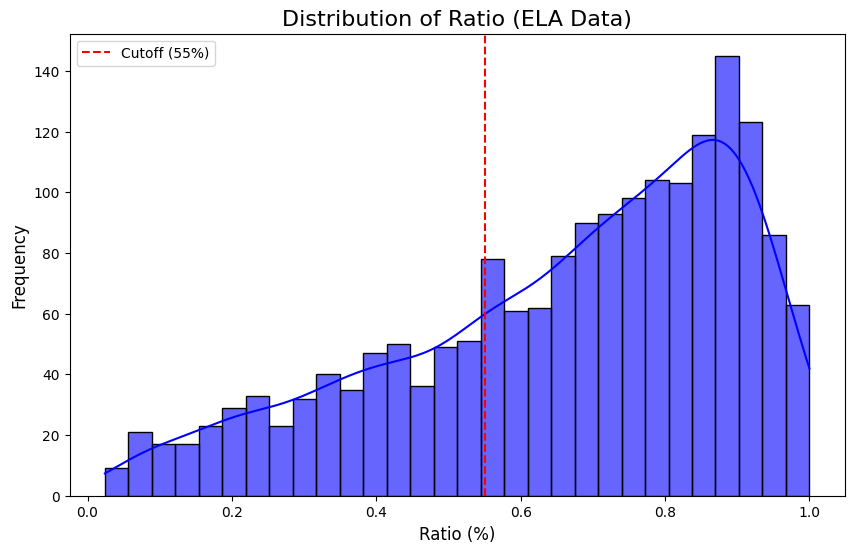

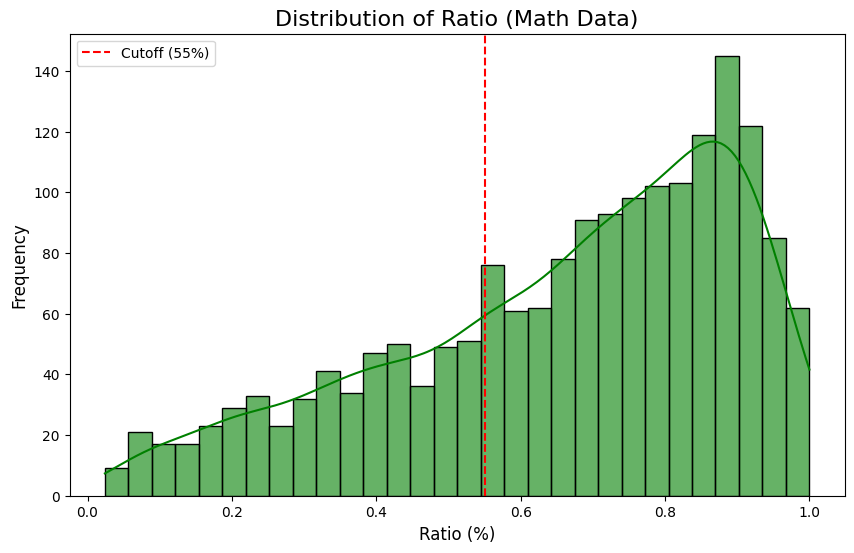

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Ratio distribution for ELA
plt.figure(figsize=(10, 6))
sns.histplot(ela_data['Ratio'], bins=30, kde=True, color='blue', alpha=0.6)
plt.axvline(x=0.55, color='red', linestyle='--', label='Cutoff (55%)')
plt.title('Distribution of Ratio (ELA Data)', fontsize=16)
plt.xlabel('Ratio (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Plot Ratio distribution for Math
plt.figure(figsize=(10, 6))
sns.histplot(math_data['Ratio'], bins=30, kde=True, color='green', alpha=0.6)
plt.axvline(x=0.55, color='red', linestyle='--', label='Cutoff (55%)')
plt.title('Distribution of Ratio (Math Data)', fontsize=16)
plt.xlabel('Ratio (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


## Looking at Mean Scores

Regression Results for ELA:
                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7348
Date:                Sat, 30 Nov 2024   Prob (F-statistic):              0.392
Time:                        13:30:24   Log-Likelihood:                -1018.8
No. Observations:                 195   AIC:                             2042.
Df Residuals:                     193   BIC:                             2048.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2570.3459   

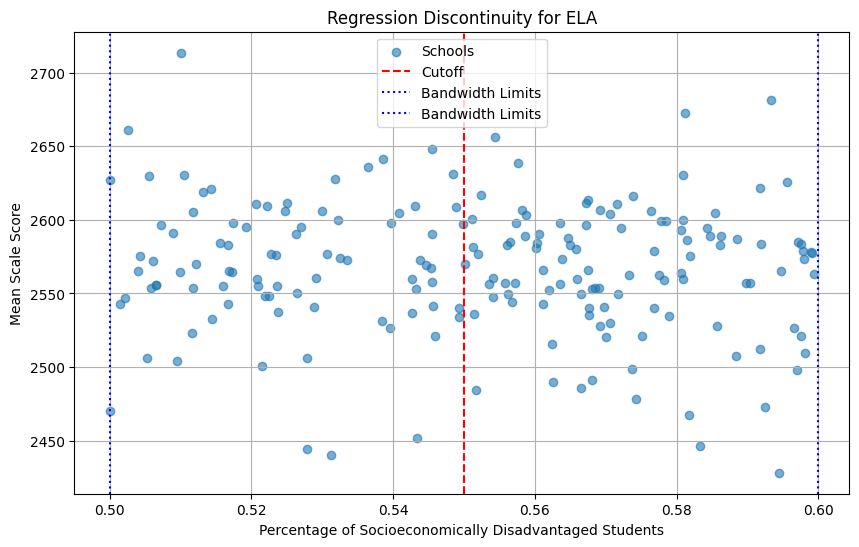

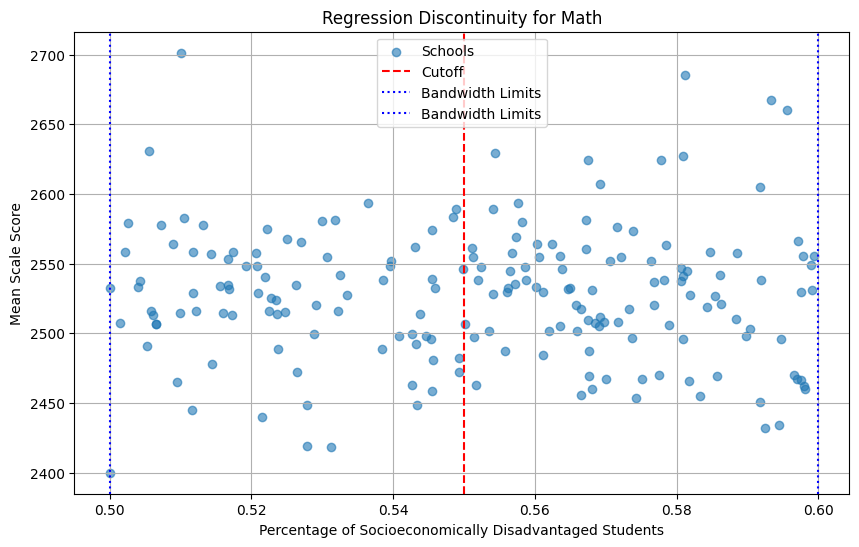

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set the cutoff and bandwidth
cutoff = 0.55  # The threshold for additional funding
bandwidth = 0.05  # The range around the cutoff to include in the analysis

# Drop rows with NaN in critical columns
ela_data = ela_data.dropna(subset=['Mean Scale Score', 'Ratio'])
math_data = math_data.dropna(subset=['Mean Scale Score', 'Ratio'])

# Apply the bandwidth filter
ela_data = ela_data[
    (ela_data['Ratio'] >= (cutoff - bandwidth)) & 
    (ela_data['Ratio'] <= (cutoff + bandwidth))
]
math_data = math_data[
    (math_data['Ratio'] >= (cutoff - bandwidth)) & 
    (math_data['Ratio'] <= (cutoff + bandwidth))
]

# Create a treatment indicator: 1 if Ratio >= cutoff, else 0
ela_data['Treatment'] = (ela_data['Ratio'] >= cutoff).astype(int)
math_data['Treatment'] = (math_data['Ratio'] >= cutoff).astype(int)

# Define the independent and dependent variables for both datasets
X_ela = ela_data['Treatment']
X_math = math_data['Treatment']

Y_ela = ela_data['Mean Scale Score']
Y_math = math_data['Mean Scale Score']

# Add a constant term for the regression
X_ela = sm.add_constant(X_ela)
X_math = sm.add_constant(X_math)

# Perform the regression analysis
model_ela = sm.OLS(Y_ela, X_ela).fit()
model_math = sm.OLS(Y_math, X_math).fit()

# Print the summaries
print("Regression Results for ELA:")
print(model_ela.summary())

print("\nRegression Results for Math:")
print(model_math.summary())

# Plot RD
def plot_rd(data, ratio_col, score_col, treatment_col, cutoff, bandwidth, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[ratio_col], data[score_col], alpha=0.6, label="Schools")
    plt.axvline(cutoff, color='red', linestyle='--', label="Cutoff")
    plt.axvline(cutoff - bandwidth, color='blue', linestyle=':', label="Bandwidth Limits")
    plt.axvline(cutoff + bandwidth, color='blue', linestyle=':', label="Bandwidth Limits")
    plt.title(title)
    plt.xlabel("Percentage of Socioeconomically Disadvantaged Students")
    plt.ylabel("Mean Scale Score")
    plt.legend()
    plt.grid()
    plt.show()

# Plot RD for ELA
plot_rd(ela_data, 'Ratio', 'Mean Scale Score', 'Treatment', cutoff, bandwidth, "Regression Discontinuity for ELA")

# Plot RD for Math
plot_rd(math_data, 'Ratio', 'Mean Scale Score', 'Treatment', cutoff, bandwidth, "Regression Discontinuity for Math")


## Controlling for School Current Spending per ADA

Explanation of Changes
Current Expense Per ADA as a Control:

Included it as a predictor in X_ela and X_math.
Ensured rows with NaN in Current Expense Per ADA are dropped before analysis.
Regressions:

Both regressions now estimate the effect of Treatment while controlling for Current Expense Per ADA.
Interpreting the Output:

The coefficient for Treatment will now represent the effect of crossing the funding cutoff on mean scale scores, adjusted for differences in current expenses.
Why Add a Control?
Including Current Expense Per ADA helps isolate the effect of the funding threshold from potential confounding due to variations in expenditure across schools. This enhances the validity of your findings.

Regression Results for ELA:
                            OLS Regression Results                            
Dep. Variable:       Mean Scale Score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.031
Date:                Sat, 30 Nov 2024   Prob (F-statistic):              0.359
Time:                        13:30:24   Log-Likelihood:                -1018.2
No. Observations:                 195   AIC:                             2042.
Df Residuals:                     192   BIC:                             2052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

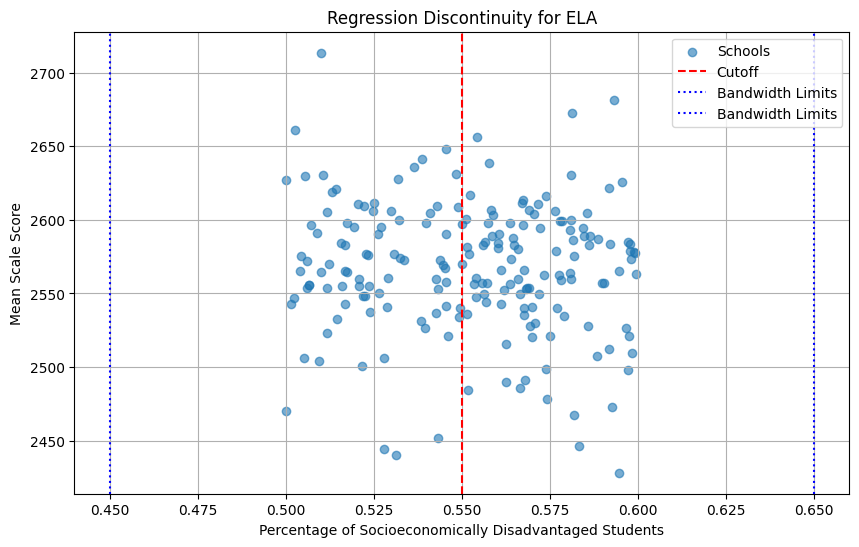

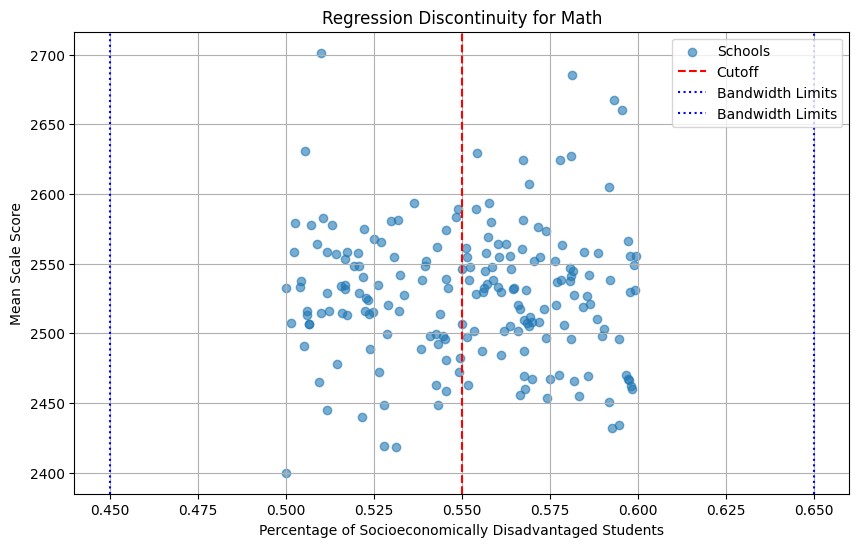

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set the cutoff and bandwidth
cutoff = 0.55  # The threshold for additional funding
bandwidth = 0.1  # The range around the cutoff to include in the analysis

# List of columns to convert to numeric
numeric_columns = [
    'Mean Scale Score',
    'Percentage Standard Exceeded',
    'Percentage Standard Met',
    'Percentage Standard Met and Above',
    'Percentage Standard Nearly Met',
    'Percentage Standard Not Met',
    'Current Expense Per ADA',
]

# Function to clean and convert columns to numeric
def clean_and_convert_to_numeric(df, columns):
    for col in columns:
        # Remove commas, dollar signs, or other non-numeric characters
        df[col] = df[col].replace({',': '', '\$': ''}, regex=True)
        # Convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Clean both datasets
ela_data = clean_and_convert_to_numeric(ela_data, numeric_columns)
math_data = clean_and_convert_to_numeric(math_data, numeric_columns)

# Drop rows with NaN in critical columns
ela_data = ela_data.dropna(subset=['Mean Scale Score', 'Ratio', 'Current Expense Per ADA'])
math_data = math_data.dropna(subset=['Mean Scale Score', 'Ratio', 'Current Expense Per ADA'])

# Apply the bandwidth filter
ela_data = ela_data[
    (ela_data['Ratio'] >= (cutoff - bandwidth)) &
    (ela_data['Ratio'] <= (cutoff + bandwidth))
]
math_data = math_data[
    (math_data['Ratio'] >= (cutoff - bandwidth)) &
    (math_data['Ratio'] <= (cutoff + bandwidth))
]

# Create a treatment indicator: 1 if Ratio >= cutoff, else 0
ela_data['Treatment'] = (ela_data['Ratio'] >= cutoff).astype(int)
math_data['Treatment'] = (math_data['Ratio'] >= cutoff).astype(int)

# Define the independent and dependent variables for both datasets
X_ela = ela_data[['Treatment', 'Current Expense Per ADA']]
X_math = math_data[['Treatment', 'Current Expense Per ADA']]

Y_ela = ela_data['Mean Scale Score']
Y_math = math_data['Mean Scale Score']

# Add a constant term for the regression
X_ela = sm.add_constant(X_ela)
X_math = sm.add_constant(X_math)

# Perform the regression analysis
model_ela = sm.OLS(Y_ela, X_ela).fit()
model_math = sm.OLS(Y_math, X_math).fit()

# Print the summaries
print("Regression Results for ELA:")
print(model_ela.summary())

print("\nRegression Results for Math:")
print(model_math.summary())

# Plot RD
def plot_rd(data, ratio_col, score_col, treatment_col, cutoff, bandwidth, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[ratio_col], data[score_col], alpha=0.6, label="Schools")
    plt.axvline(cutoff, color='red', linestyle='--', label="Cutoff")
    plt.axvline(cutoff - bandwidth, color='blue', linestyle=':', label="Bandwidth Limits")
    plt.axvline(cutoff + bandwidth, color='blue', linestyle=':', label="Bandwidth Limits")
    plt.title(title)
    plt.xlabel("Percentage of Socioeconomically Disadvantaged Students")
    plt.ylabel("Mean Scale Score")
    plt.legend()
    plt.grid()
    plt.show()

# Plot RD for ELA
plot_rd(ela_data, 'Ratio', 'Mean Scale Score', 'Treatment', cutoff, bandwidth, "Regression Discontinuity for ELA")

# Plot RD for Math
plot_rd(math_data, 'Ratio', 'Mean Scale Score', 'Treatment', cutoff, bandwidth, "Regression Discontinuity for Math")


## Code with Predictions for Other Outcomes 
    - 'Percentage Standard Exceeded'
    - 'Percentage Standard Met'
    - 'Percentage Standard Met and Above'
    - 'Percentage Standard Nearly Met'
    - 'Percentage Standard Not Met'


Regression Results for Percentage Standard Exceeded:
                                 OLS Regression Results                                 
Dep. Variable:     Percentage Standard Exceeded   R-squared:                       0.018
Model:                                      OLS   Adj. R-squared:                  0.008
Method:                           Least Squares   F-statistic:                     1.737
Date:                          Sat, 16 Nov 2024   Prob (F-statistic):              0.179
Time:                                  12:25:12   Log-Likelihood:                -744.50
No. Observations:                           195   AIC:                             1495.
Df Residuals:                               192   BIC:                             1505.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t

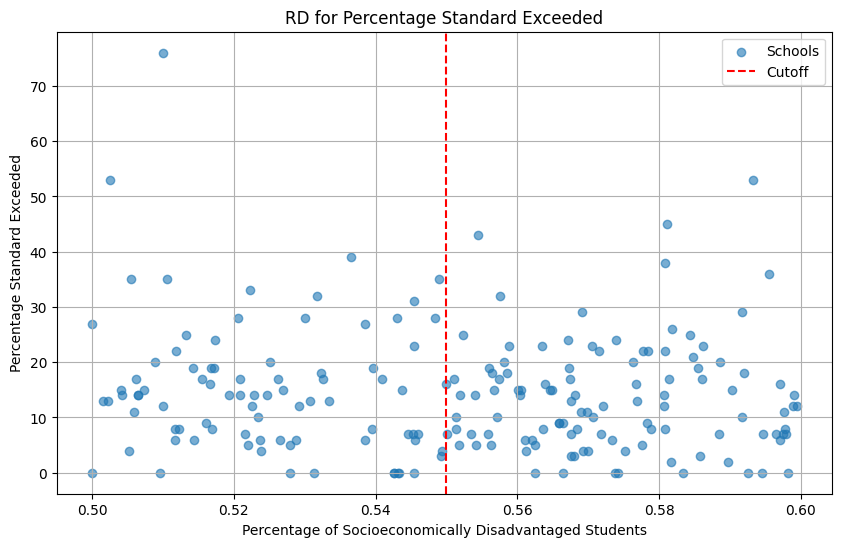


Regression Results for Percentage Standard Met:
                               OLS Regression Results                              
Dep. Variable:     Percentage Standard Met   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                 -0.004
Method:                      Least Squares   F-statistic:                    0.6335
Date:                     Sat, 16 Nov 2024   Prob (F-statistic):              0.532
Time:                             12:25:12   Log-Likelihood:                -738.35
No. Observations:                      195   AIC:                             1483.
Df Residuals:                          192   BIC:                             1493.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------

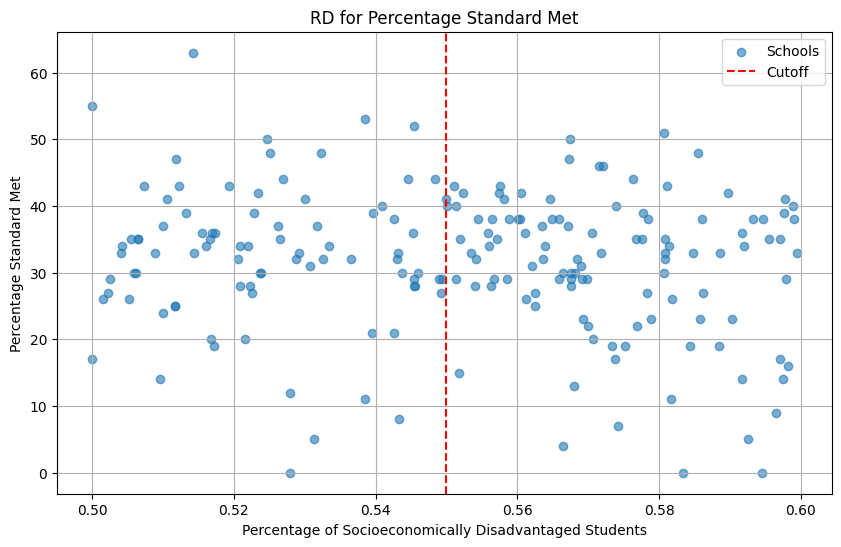


Regression Results for Percentage Standard Met and Above:
                                    OLS Regression Results                                   
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.014
Model:                                           OLS   Adj. R-squared:                  0.003
Method:                                Least Squares   F-statistic:                     1.339
Date:                               Sat, 16 Nov 2024   Prob (F-statistic):              0.265
Time:                                       12:25:12   Log-Likelihood:                -842.90
No. Observations:                                195   AIC:                             1692.
Df Residuals:                                    192   BIC:                             1702.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
 

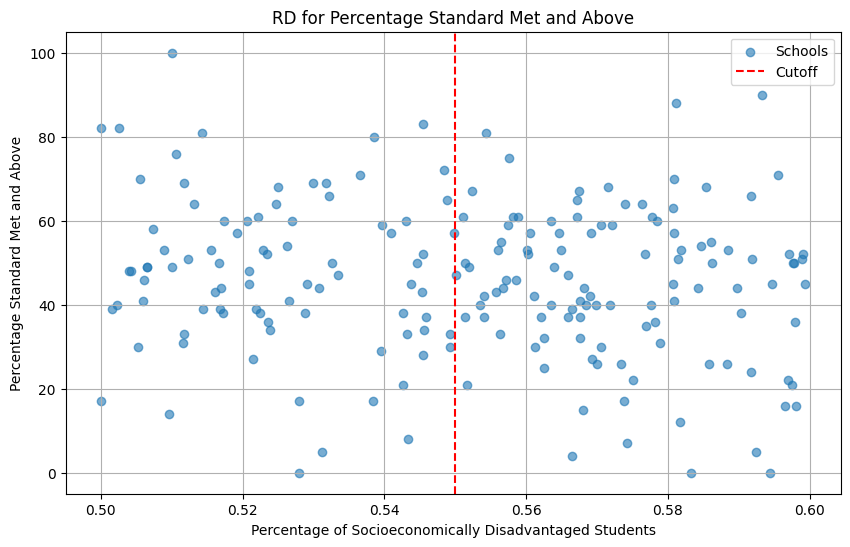


Regression Results for Percentage Standard Nearly Met:
                                  OLS Regression Results                                  
Dep. Variable:     Percentage Standard Nearly Met   R-squared:                       0.009
Model:                                        OLS   Adj. R-squared:                 -0.001
Method:                             Least Squares   F-statistic:                    0.8755
Date:                            Sat, 16 Nov 2024   Prob (F-statistic):              0.418
Time:                                    12:25:12   Log-Likelihood:                -716.19
No. Observations:                             195   AIC:                             1438.
Df Residuals:                                 192   BIC:                             1448.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                              coef

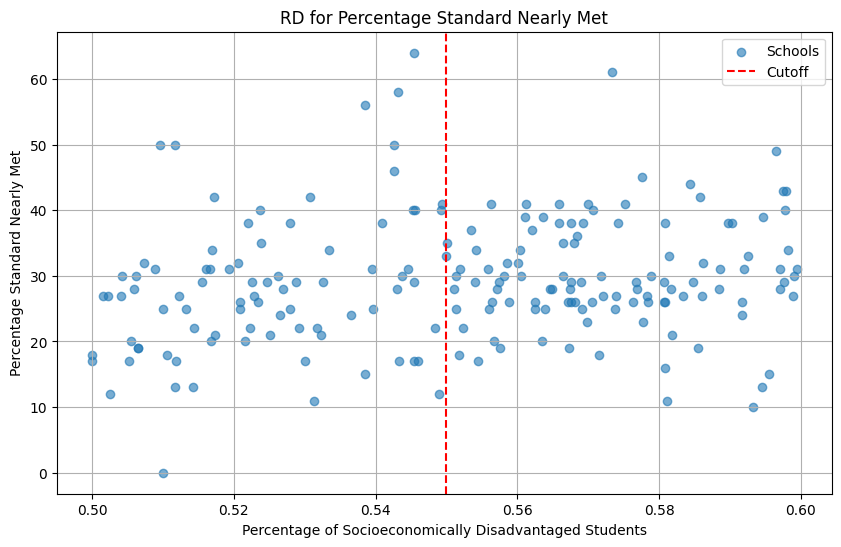


Regression Results for Percentage Standard Not Met:
                                 OLS Regression Results                                
Dep. Variable:     Percentage Standard Not Met   R-squared:                       0.009
Model:                                     OLS   Adj. R-squared:                 -0.001
Method:                          Least Squares   F-statistic:                    0.8570
Date:                         Sat, 16 Nov 2024   Prob (F-statistic):              0.426
Time:                                 12:25:12   Log-Likelihood:                -818.77
No. Observations:                          195   AIC:                             1644.
Df Residuals:                              192   BIC:                             1653.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|

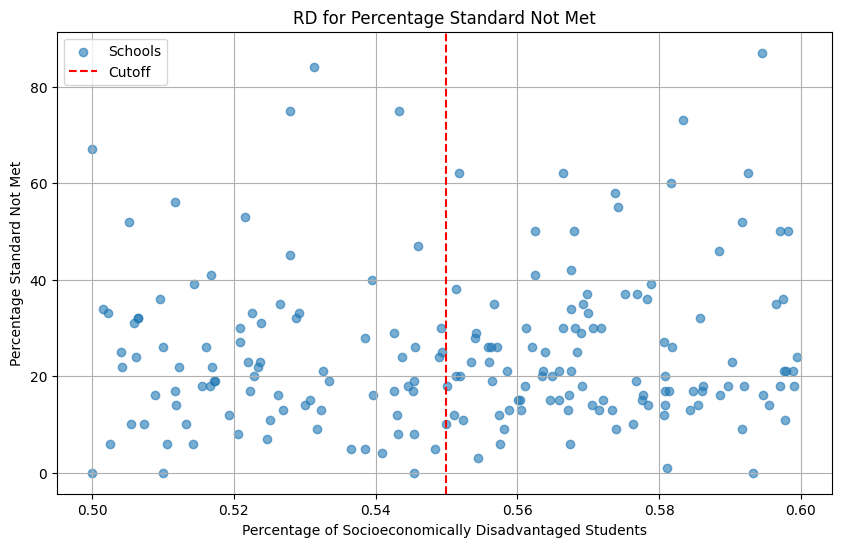


Regression Results for Percentage Standard Exceeded:
                                 OLS Regression Results                                 
Dep. Variable:     Percentage Standard Exceeded   R-squared:                       0.022
Model:                                      OLS   Adj. R-squared:                  0.012
Method:                           Least Squares   F-statistic:                     2.147
Date:                          Sat, 16 Nov 2024   Prob (F-statistic):              0.120
Time:                                  12:25:12   Log-Likelihood:                -625.06
No. Observations:                           193   AIC:                             1256.
Df Residuals:                               190   BIC:                             1266.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                              coef    std err          t

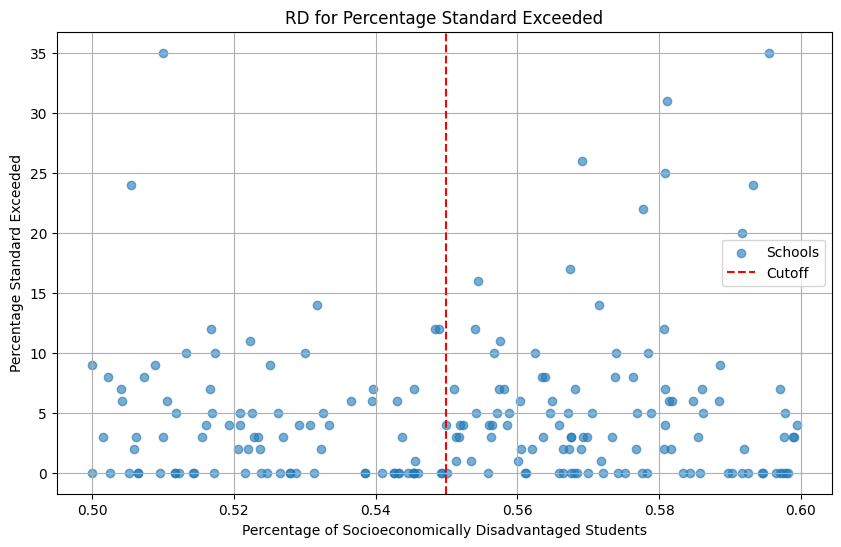


Regression Results for Percentage Standard Met:
                               OLS Regression Results                              
Dep. Variable:     Percentage Standard Met   R-squared:                       0.035
Model:                                 OLS   Adj. R-squared:                  0.025
Method:                      Least Squares   F-statistic:                     3.450
Date:                     Sat, 16 Nov 2024   Prob (F-statistic):             0.0338
Time:                             12:25:12   Log-Likelihood:                -702.97
No. Observations:                      193   AIC:                             1412.
Df Residuals:                          190   BIC:                             1422.
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------

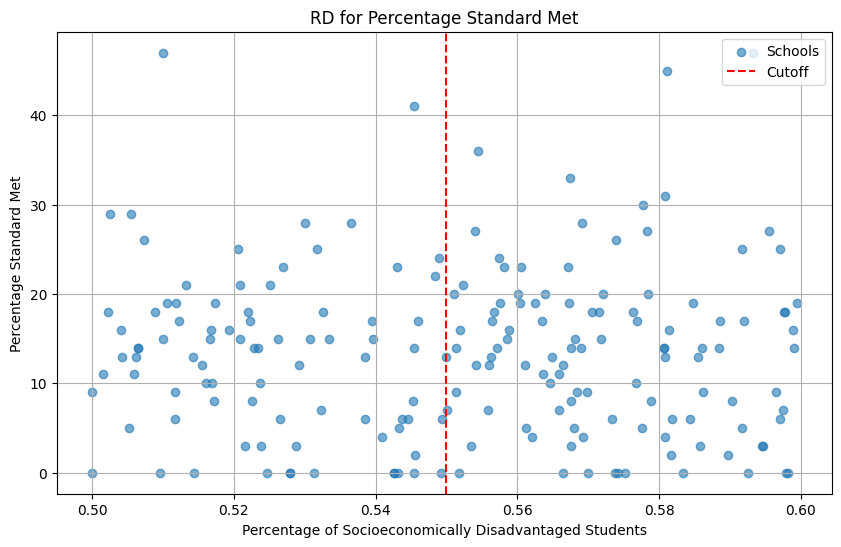


Regression Results for Percentage Standard Met and Above:
                                    OLS Regression Results                                   
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.032
Model:                                           OLS   Adj. R-squared:                  0.022
Method:                                Least Squares   F-statistic:                     3.143
Date:                               Sat, 16 Nov 2024   Prob (F-statistic):             0.0454
Time:                                       12:25:12   Log-Likelihood:                -786.86
No. Observations:                                193   AIC:                             1580.
Df Residuals:                                    190   BIC:                             1590.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
 

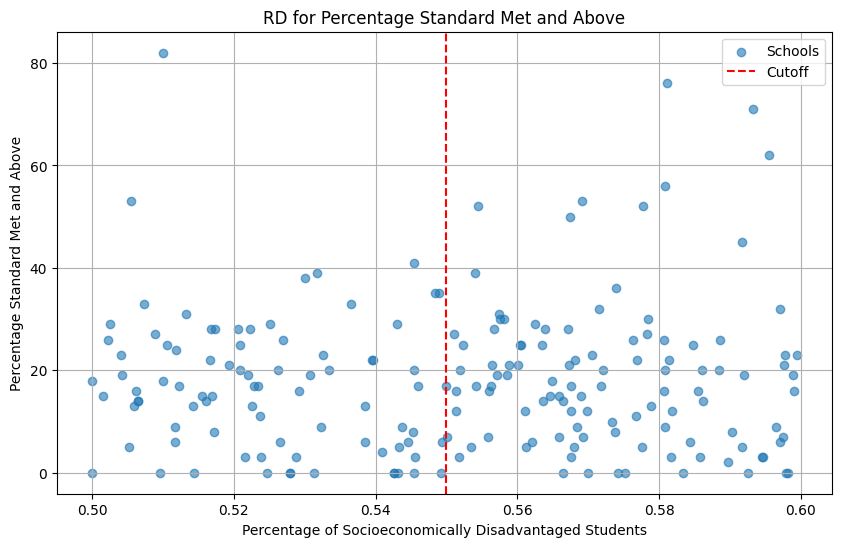


Regression Results for Percentage Standard Nearly Met:
                                  OLS Regression Results                                  
Dep. Variable:     Percentage Standard Nearly Met   R-squared:                       0.004
Model:                                        OLS   Adj. R-squared:                 -0.006
Method:                             Least Squares   F-statistic:                    0.4117
Date:                            Sat, 16 Nov 2024   Prob (F-statistic):              0.663
Time:                                    12:25:12   Log-Likelihood:                -704.41
No. Observations:                             193   AIC:                             1415.
Df Residuals:                                 190   BIC:                             1425.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                              coef

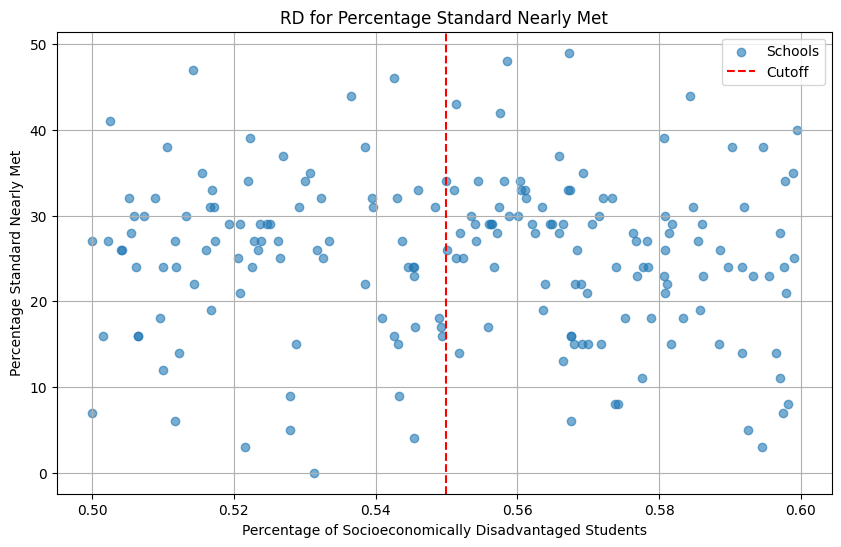


Regression Results for Percentage Standard Not Met:
                                 OLS Regression Results                                
Dep. Variable:     Percentage Standard Not Met   R-squared:                       0.028
Model:                                     OLS   Adj. R-squared:                  0.018
Method:                          Least Squares   F-statistic:                     2.735
Date:                         Sat, 16 Nov 2024   Prob (F-statistic):             0.0674
Time:                                 12:25:13   Log-Likelihood:                -842.43
No. Observations:                          193   AIC:                             1691.
Df Residuals:                              190   BIC:                             1701.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|

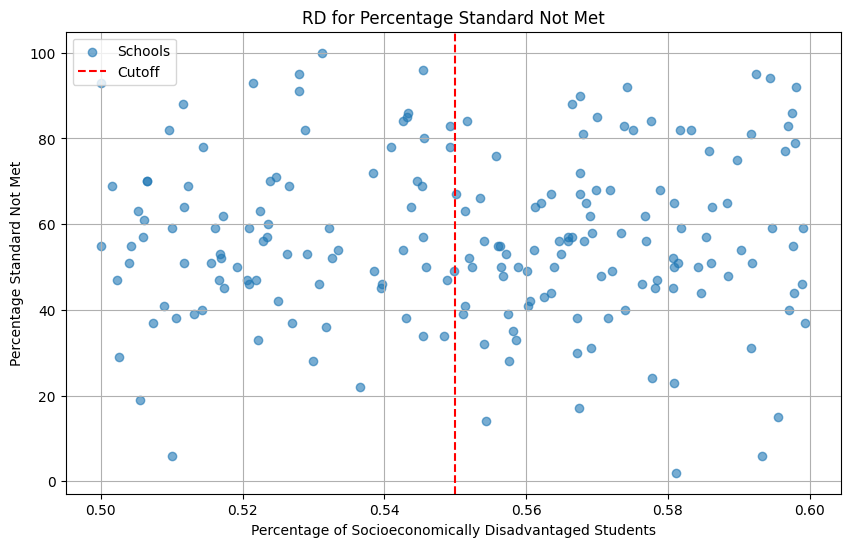

In [160]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set the cutoff and bandwidth
cutoff = 0.55  # The threshold for additional funding
bandwidth = 0.05  # The range around the cutoff to include in the analysis

# List of outcome variables for prediction
outcome_columns = [
    'Percentage Standard Exceeded',
    'Percentage Standard Met',
    'Percentage Standard Met and Above',
    'Percentage Standard Nearly Met',
    'Percentage Standard Not Met'
]

# Function to run the regression and print the results for multiple outcomes
def run_regression_for_outcomes(data, outcome_columns, cutoff, bandwidth):
    for outcome in outcome_columns:
        # Define the independent variables (Treatment and control for 'Current Expense Per ADA')
        X = data[['Treatment', 'Current Expense Per ADA']]
        Y = data[outcome]

        # Add a constant term for the regression
        X = sm.add_constant(X)

        # Perform the regression analysis
        model = sm.OLS(Y, X).fit()

        # Print the results for each outcome
        print(f"\nRegression Results for {outcome}:")
        print(model.summary())

        # Plot RD for the current outcome
        plot_rd(data, 'Ratio', outcome, 'Treatment', cutoff, bandwidth, f"RD for {outcome}")

# Function to plot the RD for the outcome
def plot_rd(data, ratio_col, score_col, treatment_col, cutoff, bandwidth, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[ratio_col], data[score_col], alpha=0.6, label="Schools")
    plt.axvline(cutoff, color='red', linestyle='--', label="Cutoff")
    plt.title(title)
    plt.xlabel("Percentage of Socioeconomically Disadvantaged Students")
    plt.ylabel(score_col)  # Dynamically use the outcome variable as the label
    plt.legend()
    plt.grid()
    plt.show()

# Run the regression for ELA data
run_regression_for_outcomes(ela_data, outcome_columns, cutoff, bandwidth)

# Run the regression for Math data
run_regression_for_outcomes(math_data, outcome_columns, cutoff, bandwidth)